In [81]:
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [82]:
wines= load_wine()
wines.feature_names
wine_df= pd.DataFrame(wines.data, columns= wines.feature_names)
wine_df.head()





,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
##standardize the wine dataset
wine_std= StandardScaler().fit_transform(wine_df)

pc= PCA(n_components=9)

wine_pcs= pc.fit_transform(wine_std)

pc_df= pd.DataFrame(wine_pcs, columns=['Principal Component 1','Principal Component 2', 'Princpal Component 3','Principal Component 4','Principal Component 5','Principal Component 6','Principal Component 7', 'Princpal Component8 ','Principal Component 9'])
pc_df.head()


,Principal Component 1,Principal Component 2,Princpal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Princpal Component8,Principal Component 9
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819


The PCs contain 94.23969775056236% of the original information


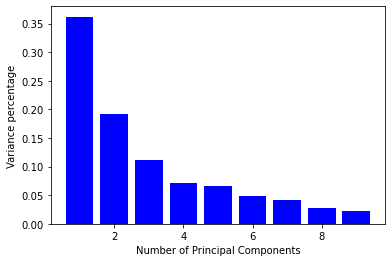

In [25]:
pc_range= range(1, pc.n_components+1)
plt.bar(pc_range, pc.explained_variance_ratio_, color='blue')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance percentage')
print('The PCs contain {}% of the original information'.format(np.sum(pc.explained_variance_ratio_)*100))

Text(0.5, 0, 'Principal Component 2')

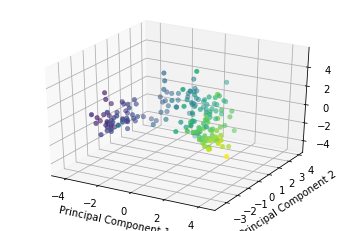

In [26]:
principal_component= pd.DataFrame(wine_pcs)
ax=plt.axes(projection='3d')
ax.scatter(principal_component[0],principal_component[1],principal_component[2], c=principal_component[0], cmap='viridis', linewidth=0.5);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


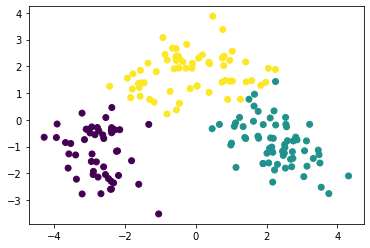

In [18]:
##IMPLEMENTING K-MEANS CLUSTERING
##I

inertia= []

model = KMeans(n_clusters=3)
model.fit(principal_component.iloc[:,:2])

labels = model.predict(principal_component.iloc[:,:2])
plt.scatter(principal_component[0], principal_component[1], c=labels)
plt.show()
